# Face recognition with correlation coefficients and euclidean distance. comparison of the two methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Contents of the project
[Introduction](#introduction) <br>
[Raw Data](#raw-data) <br>
[Euclidean distance](#euclidean-distance) <br>
[Correlation coefficients](#correlations) <br>
[Visual comparison of the results of the two methods](#compare) <br>
[Calculated comparison of the results of the two methods](#compare2) <br>
[Conclusion](#conclusion) <br>
[Sources](#sources) <br>

<a id='introduction'></a>
# Introduction

The goal of this project is based on photos of a person that we have and know to be his, to establish new test photos whether they are of the same person or not.

Facial recognition has a number of applications
- The realm of security. Identifying a perpetrator of a crime in a photo database.
- Verification in apps with facial recognition
- Unlock phones or laptops with facial recognition

The goal of this project is based on photos of a person that we have and know to be his, to establish new test photos whether they are of the same person or not.

We will compare images by Correlation Coefficients as well as by Euclidean Distance. Presenting their results, we will find out which method gives correct results. We will then compare the performance of the two methods by graphing it and then measuring it.

<a id='raw-data'></a>
# Raw Data

For the purposes of the experiment, 10 photos of the actor Jason Statham were collected from the Internet, setting an averaged image.


<table>
<tr>
<td><img src="images-faceonly/js01.jpg" width="200" height="200" />
<td><img src="images-faceonly/js02.jpg" width="200" height="200" />
<td><img src="images-faceonly/js03.jpg" width="200" height="200" />
<td><img src="images-faceonly/js04.jpg" width="200" height="200" />
<td><img src="images-faceonly/js05.jpg" width="200" height="200" />
</tr>
<tr>
<td><img src="images-faceonly/js06.jpg" width="200" height="200" />
<td><img src="images-faceonly/js07.jpg" width="200" height="200" />
<td><img src="images-faceonly/js08.jpg" width="200" height="200" />
<td><img src="images-faceonly/js09.jpg" width="200" height="200" />
<td><img src="images-faceonly/js10.jpg" width="200" height="200" />
</tr>

</table>



Images of other faces are also collected to compare with the averaged one. 4 of them to the same person and 4 to other persons.

<table>
<tr>
<td><img src="images-test-faceonly/test_01_js.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_02_js.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_03_js.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_04_js.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_05_ws.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_06_kr.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_07_jc.jpg" width="200" height="200" />
<td><img src="images-test-faceonly/test_08_ip.jpg" width="200" height="200" />
</tr>
<tr>
<td>test_01_js
<td>test_02_js
<td>test_03_js
<td>test_04_js
<td>test_05_ws
<td>test_06_kr
<td>test_07_jc
<td>test_08_ip
</tr>
<tr>
<td>Jason Statham
<td>Jason Statham
<td>Jason Statham
<td>Jason Statham
<td>Will Smith
<td>Kiano Rives
<td>Jekie Chan
<td>Ivo Petkov (Me)
</tr>
</table>

Preparing the images for this project:
- Collected from the internet.
- 200x200 pixels are cropped.
- Faces are centered and resized so that parts of them are in almost the same places.
- Background removed.
- Removed the body from the face

# Load the images into np.array
We load the test images into np.array with the same names as the files respectively. Already at this step, we make them black and white to avoid color values and each element of np.array having values from 0 to 255.

In [2]:
test_01_js = np.array(Image.open('images-test-faceonly/test_01_js.jpg').convert('L')) # Jason Statham
test_02_js = np.array(Image.open('images-test-faceonly/test_02_js.jpg').convert('L')) # Jason Statham
test_03_js = np.array(Image.open('images-test-faceonly/test_03_js.jpg').convert('L')) # Jason Statham - Grimace
test_04_js = np.array(Image.open('images-test-faceonly/test_04_js.jpg').convert('L')) # Jason Statham
test_05_ws = np.array(Image.open('images-test-faceonly/test_05_ws.jpg').convert('L')) # Will Smith
test_06_kr = np.array(Image.open('images-test-faceonly/test_06_kr.jpg').convert('L')) # Kiano Rives
test_07_jc = np.array(Image.open('images-test-faceonly/test_07_jc.jpg').convert('L')) # Jekie Chan
test_08_ip = np.array(Image.open('images-test-faceonly/test_08_ip.jpg').convert('L')) # Me

Create an averaged image from the photos in the specified directory.

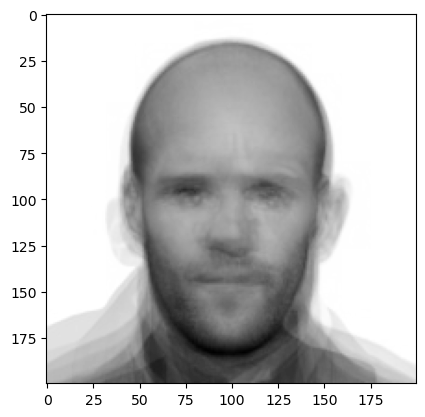

In [3]:
# Create a list of file names in the images folder
files = os.listdir('images-nobkg')

# Load the first image and determine the size of the matrix to store the sum of the images
img = Image.open('images-nobkg/'+files[0]).convert('L')
img_arr = np.array(img, dtype=float)
img_sum = np.zeros_like(img_arr, dtype=float)

# Adding all images to the sum and turning them into NumPy arrays
for file in files[1:]:
     img = Image.open('images-nobkg/'+file).convert('L')
     img_arr = np.array(img, dtype=float)
     img_sum += img_arr

# Calculate the averaged image
avg_img = img_sum / len(files)

# Rescale the image to the range [0, 255] and convert to a NumPy array
avg_img = np.uint8(avg_img / np.max(avg_img) * 255)

# Plotting the averaged image
plt.imshow(avg_img, cmap='gray')
plt.show()

<a id='euclidean-distance'></a>
# Euclidean distance

In mathematics, the Euclidean distance between two points in Euclidean space is the length of a segment between the two points. It can be calculated from the Cartesian coordinates of the points using the Pythagorean theorem [1]

In our case $\text{distance} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}\$, where:

$x_i$ is the i-th element of the first vector <br>
$y_i$ is the ith element of the second vector <br>
$n$ is the number of elements in the vectors <br>

For the purpose of the experiment, we create a list of test image names and their Euclidean distances and visualize it.

In [4]:
distances = {
    'test_01_js': np.linalg.norm(avg_img.flatten() - test_01_js.flatten()),
    'test_02_js': np.linalg.norm(avg_img.flatten() - test_02_js.flatten()),
    'test_03_js': np.linalg.norm(avg_img.flatten() - test_03_js.flatten()),
    'test_04_js': np.linalg.norm(avg_img.flatten() - test_04_js.flatten()),
    'test_05_ws': np.linalg.norm(avg_img.flatten() - test_05_ws.flatten()),
    'test_06_kr': np.linalg.norm(avg_img.flatten() - test_06_kr.flatten()),
    'test_07_jc': np.linalg.norm(avg_img.flatten() - test_07_jc.flatten()),
    'test_08_ip': np.linalg.norm(avg_img.flatten() - test_08_ip.flatten())
}

# Print the results
for test, distance in distances.items():
    print(f"{test}: {distance:.2f}")

test_01_js: 28681.32
test_02_js: 32720.78
test_03_js: 30015.33
test_04_js: 26996.64
test_05_ws: 21428.31
test_06_kr: 23341.63
test_07_jc: 25081.12
test_08_ip: 24237.01


From here it can be seen that images with Jason Statham have higher values.


This would be more clear when we visualize it.

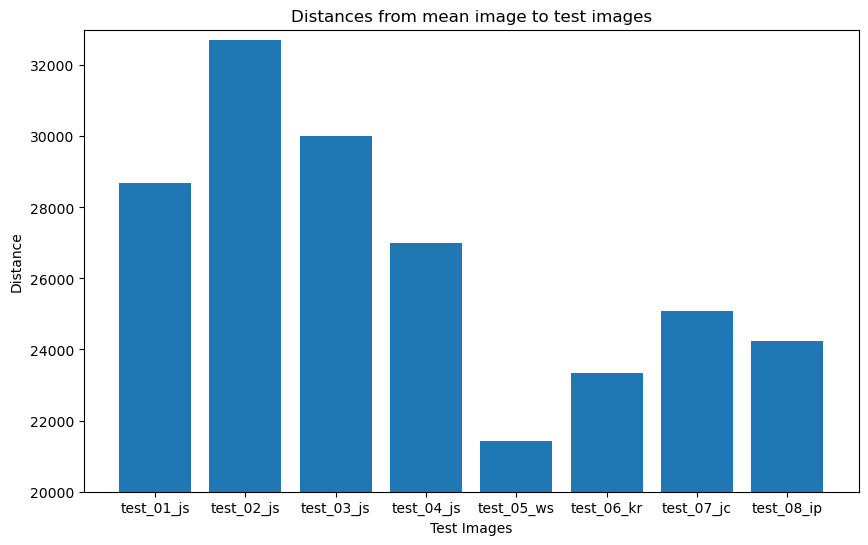

In [5]:
# Retrieve test image names and distances
tests = list(distances.keys())
distances_values = list(distances.values())

plt.figure(figsize=(10, 6))
# Build the bar chart
plt.bar(tests, distances_values)
plt.xlabel('Test Images')
plt.ylabel('Distance')
plt.title('Distances from mean image to test images')
# plt.xticks(rotation=45)
plt.ylim(20000, 33000) #Limit the maximum and minimum of the graph, for better presentation
plt.show()

On this bar chart, after limiting the minimum and maximum value to be displayed, the difference between the photos with the wanted person and the others is clearly visible.<br><br>
We'll get a better idea when we look at the numbers showing the limits, as well as the averages of the two sets of images - with and without Jason Staton.

In [6]:
distances_js = dict(list(distances.items())[0:4])
distances_not_js = dict(list(distances.items())[4:8])

avg_distances_js = np.mean(list(distances_js.values()))
avg_distances_not_js = np.mean(list(distances_not_js.values()))

max_distances_js = np.max(list(distances_js.values()))
max_distances_not_js = np.max(list(distances_not_js.values()))

min_distances_js = np.min(list(distances_js.values()))
min_distances_not_js = np.min(list(distances_not_js.values()))

print(f"The average coefficient of test images with Jason Statham is {avg_distances_js:.2f} and of those with someone else is {avg_distances_not_js:.2f}")
print(f"The difference between them is {avg_distances_js - avg_distances_not_js:.2f}")
print(f"The images he is in are in the range {min_distances_js:.2f} - {max_distances_js:.2f}")
print(f"Images with someone else are in the range {min_distances_not_js:.2f} - {max_distances_not_js:.2f}")
print(f"The difference between the smallest coefficient of Jason Statham and the largest of an image that does not contain him is {min_distances_js - max_distances_not_js:.2f}")

The average coefficient of test images with Jason Statham is 29603.52 and of those with someone else is 23522.02
The difference between them is 6081.50
The images he is in are in the range 26996.64 - 32720.78
Images with someone else are in the range 21428.31 - 25081.12
The difference between the smallest coefficient of Jason Statham and the largest of an image that does not contain him is 1915.52


Since the ranges have no intersection, even between them there is a range of 1915.52, we can say that the experiment is successful, and based on whether new images fall within the corresponding limits or not, they can give us information if it is him.

A better visual idea of the boundaries can be seen in the following figure:

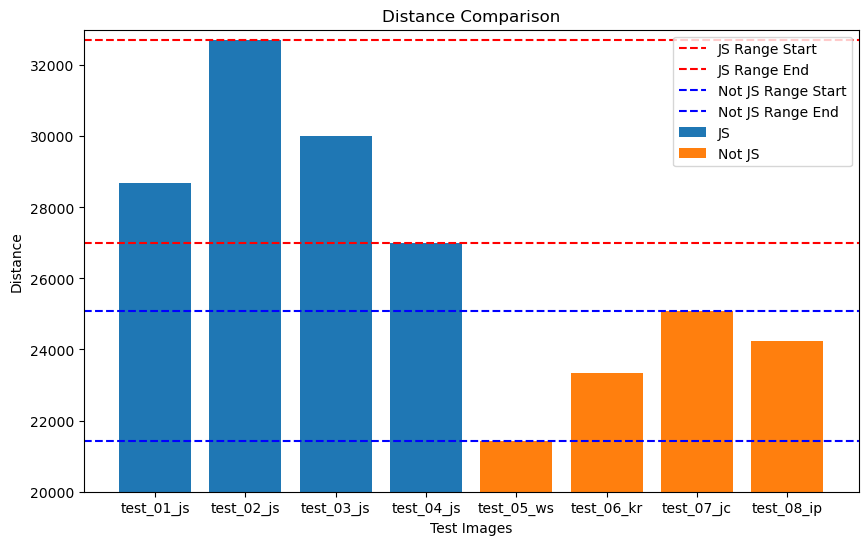

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

# Build the bar chart for distances_js
ax.bar(distances_js.keys(), distances_js.values(), label='JS')
# Build the bar chart for distances_not_js
ax.bar(distances_not_js.keys(), distances_not_js.values(), label='Not JS')

# Add vertical lines to show start and end of ranges
ax.axhline(y=min_distances_js, color='r', linestyle='--', label='JS Range Start')
ax.axhline(y=max_distances_js, color='r', linestyle='--', label='JS Range End')
ax.axhline(y=min_distances_not_js, color='b', linestyle='--', label='Not JS Range Start')
ax.axhline(y=max_distances_not_js, color='b', linestyle='--', label='Not JS Range End')

ax.legend()

# Title and axes
plt.title('Distance Comparison')
plt.xlabel('Test Images')
plt.ylabel('Distance')
plt.ylim(20000, 33000) #Limit the maximum and minimum of the graph, for better presentation
plt.show()

<a id='correlations'></a>
# Correlation coefficients

Pearson's correlation coefficient is perhaps the most widely used measure of linear relationships between two normally distributed variables, and is therefore often referred to simply as the "correlation coefficient" [3]

$$\rho_{X,Y} = \frac{{\text{{cov}}(X, Y)}}{{\sigma_X \cdot \sigma_Y}}$$

Correlation is a mathematical term that in a general sense means a measure of stochastic (probabilistic, non-functional) dependence between random variables and means a statistical mutual relationship between two or more random variables.

A high correlation between two quantities does not necessarily imply a causal relationship between them. For example, measurements in a group of cities of the percentage of drivers and the average level of alcohol sales may reveal high levels of correlation between the two quantities, but this is a reflection of the number of residents in each city on each of the two measurements.

In a narrower sense, the term correlation is understood as a synonym for correlation coefficient $ρ$ which is a measure of dependence between two random variables $x$ and $y$, defined as their covariance normalized by (divided by) the product of their standard deviations (variations) [2]

And the rating:

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2 \sum_{i=1}^{n}(y_i - \overline{y})^2}} $$

where $x_i$ and $y_i$ are the corresponding values of the two vectors, and $\bar{x}$ and $\bar{y}$ are their average values.

We create a list of the names of the test images and the corresponding correlation coefficients against the averaged image and visualize it.

In [8]:
#Create a dictionary with the correlation coefficients
correlations = {
    'test_01_js': np.corrcoef(avg_img.flatten(), test_01_js.flatten())[0][1],
    'test_02_js': np.corrcoef(avg_img.flatten(), test_02_js.flatten())[0][1],
    'test_03_js': np.corrcoef(avg_img.flatten(), test_03_js.flatten())[0][1],
    'test_04_js': np.corrcoef(avg_img.flatten(), test_04_js.flatten())[0][1],
    'test_05_ws': np.corrcoef(avg_img.flatten(), test_05_ws.flatten())[0][1],
    'test_06_kr': np.corrcoef(avg_img.flatten(), test_06_kr.flatten())[0][1],
    'test_07_jc': np.corrcoef(avg_img.flatten(), test_07_jc.flatten())[0][1],
    'test_08_ip': np.corrcoef(avg_img.flatten(), test_08_ip.flatten())[0][1]
}

for test, correlation in correlations.items():
    print(f"{test}: {correlation}")

test_01_js: 0.730313023186747
test_02_js: 0.6826169366400802
test_03_js: 0.6568069866470114
test_04_js: 0.690489963965318
test_05_ws: 0.6064701537272597
test_06_kr: 0.5430505551519634
test_07_jc: 0.5177718611581393
test_08_ip: 0.5419241830669719


Here we see that the odds for images with Jason Statham are higher than the others.



To see how they look visually, we look at them in a bar chart in the appropriate limits.

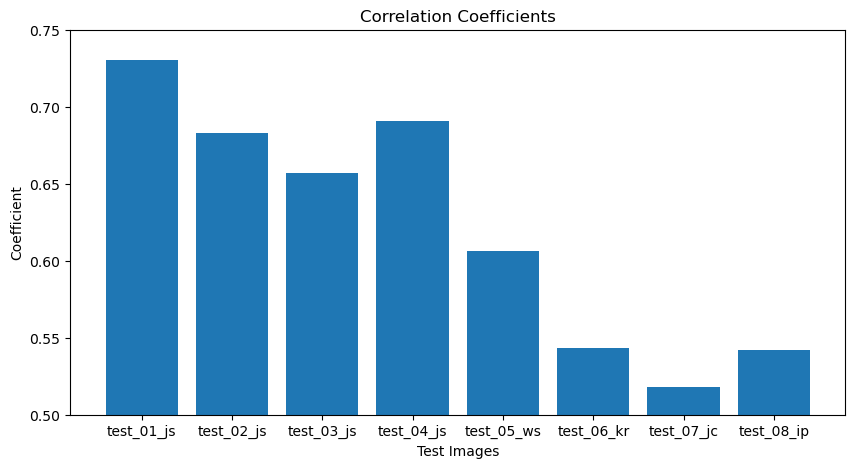

In [9]:
# generate a list of test names
test_names = list(correlations.keys())

# generate a list of correlations
correlation_values = list(correlations.values())


fig, ax = plt.subplots(figsize=(10, 5))
# build the graph
plt.bar(test_names, correlation_values)
plt.xlabel('Test Images')
plt.title("Correlation Coefficients")
plt.ylabel("Coefficient")
ax.set_ylim([0.50, 0.75]) #Limit the maximum and minimum of the graph, for better presentation
plt.show()

In the graph, it is now clear that the images with the js suffix have larger values than the others.


To get a clearer picture, we aggregate the data by dividing the dictionary into two hours, for images with and without Jason Statham.

In [10]:
correlations_js = dict(list(correlations.items())[0:4])
correlations_not_js = dict(list(correlations.items())[4:8])

avg_correlations_js = np.mean(list(correlations_js.values()))
avg_correlations_not_js = np.mean(list(correlations_not_js.values()))

max_correlations_js = np.max(list(correlations_js.values()))
max_correlations_not_js = np.max(list(correlations_not_js.values()))

min_correlations_js = np.min(list(correlations_js.values()))
min_correlations_not_js = np.min(list(correlations_not_js.values()))

print(f"The average coefficient of test images with Jason Statham is {avg_correlations_js:.2f}, and of those with someone else is {avg_correlations_not_js:.2f}")
print(f"The difference between them is {avg_correlations_js - avg_correlations_not_js:.2f}")
print(f"The images he is in are in the range {min_correlations_js:.2f} - {max_correlations_js:.2f}")
print(f"Images featuring someone else are in the range {min_correlations_not_js:.2f} - {max_correlations_not_js:.2f}")
print(f"The difference between the smallest coefficient of Jason Statham and the largest of an image not featuring him is {min_correlations_js - max_correlations_not_js:.2f}")

The average coefficient of test images with Jason Statham is 0.69, and of those with someone else is 0.55
The difference between them is 0.14
The images he is in are in the range 0.66 - 0.73
Images featuring someone else are in the range 0.52 - 0.61
The difference between the smallest coefficient of Jason Statham and the largest of an image not featuring him is 0.05


In this experiment, as in the previous one, the ranges have no intersection, and between them there is a range of 0.05, we can say that the experiment is successful, and based on whether new images fall within the corresponding limits or not, they can give us information whether it is .

For a better visual idea of the boundaries, we can see in the following figure:

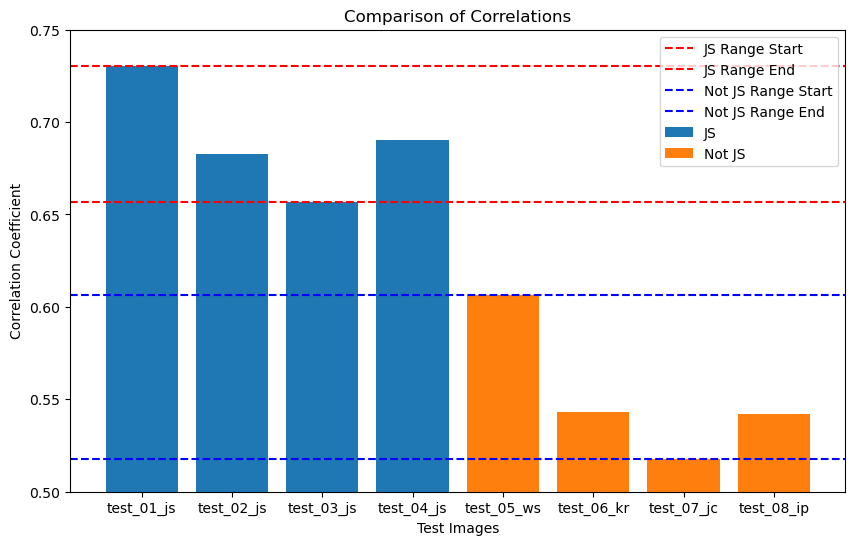

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

# Build the bar chart for correlations_js
ax.bar(correlations_js.keys(), correlations_js.values(), label='JS')
# Build the bar chart for correlations_not_js
ax.bar(correlations_not_js.keys(), correlations_not_js.values(), label='Not JS')

# Add vertical lines to show start and end of ranges
ax.axhline(y=min_correlations_js, color='r', linestyle='--', label='JS Range Start')
ax.axhline(y=max_correlations_js, color='r', linestyle='--', label='JS Range End')
ax.axhline(y=min_correlations_not_js, color='b', linestyle='--', label='Not JS Range Start')
ax.axhline(y=max_correlations_not_js, color='b', linestyle='--', label='Not JS Range End')

# Shaping the legend
ax.legend()

# Title and axes
plt.title('Comparison of Correlations')
plt.xlabel('Test Images')
plt.ylabel('Correlation Coefficient')
ax.set_ylim([0.50, 0.75]) #Limit the maximum and minimum of the graph, for better presentation
plt.show()

<a id='compare'></a>
# Visual comparison of the results of the two methods

Now that the two types of images with and without the wanted face are separated into two separate lists of correlation coefficients and two more separate ones with Euclidean distance, we could look at them in a boxplot.

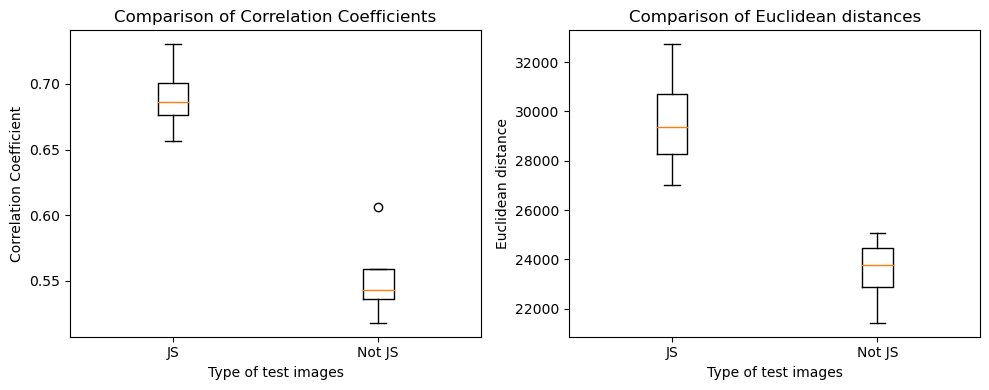

In [12]:
correlations_js = dict(list(correlations.items())[0:4])
correlations_not_js = dict(list(correlations.items())[4:8])

# Create a list of correlation coefficient values
correlations_js_values = list(correlations_js.values())
correlations_not_js_values = list(correlations_not_js.values())

# Build a box plot for the correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the correlations
ax1.boxplot([correlations_js_values, correlations_not_js_values])
ax1.set_xticklabels(['JS', 'Not JS'])
ax1.set_xlabel('Type of test images')
ax1.set_ylabel('Correlation Coefficient')
ax1.set_title('Comparison of Correlation Coefficients')

# Building a box plot for the distances
distances_js = dict(list(distances.items())[0:4])
distances_not_js = dict(list(distances.items())[4:8])

# Create a list of distance values
distances_js_values = list(distances_js.values())
distances_not_js_values = list(distances_not_js.values())

# Plot the distances
ax2.boxplot([distances_js_values, distances_not_js_values])
ax2.set_xticklabels(['JS', 'Not JS'])
ax2.set_xlabel('Type of test images')
ax2.set_ylabel('Euclidean distance')
ax2.set_title('Comparison of Euclidean distances')

# Automatic rendering of the subfigures
plt.tight_layout()

# Display the figure
plt.show()

Here it is clearly seen that the distance between the two groups is greater in the correlation coefficient than in the Euclidean distance. However, it is difficult to see clearly with the naked eye. It also raises the question of how much more accurate this method is and how to measure it. For this reason, we have to make a calculated comparison of the results of the two methods.

<a id='compare2'></a>
# Calculated comparison of the results of the two methods
To compare which of the two methods more clearly distinguishes Jason Statham's images from the others, we will check the boundaries of the two models' values that lie between the two sets of photos.


![Compare](compare.jpg)

To see which model performs better, we calculate the difference ratios $D$ and the entire range $R$ (the images with the searched face, that of the images without it, and the distance between them). Let's call this difference $K$. Then it will look like this:

$$K = \frac{D}{R}$$

In [13]:
distances_range = max_distances_js - min_distances_not_js
distances_difference = min_distances_js - max_distances_not_js
distances_difference_percent = distances_difference / distances_range

correlations_range = max_correlations_js - min_correlations_not_js
correlations_difference = min_correlations_js - max_correlations_not_js
correlations_difference_percent = correlations_difference / correlations_range

print(f"At the Euclidean distance we get a difference {distances_difference_percent * 100:.2f}%")
print(f"In Correlation coefficients we get a difference {correlations_difference_percent * 100 :.2f}%")
print(f"The difference between them is {(correlations_difference_percent - distances_difference_percent) * 100 :.2f}% more in favor of the Correlation coefficients")

At the Euclidean distance we get a difference 16.96%
In Correlation coefficients we get a difference 23.68%
The difference between them is 6.72% more in favor of the Correlation coefficients


<a id='conclusion'></a>
# Conclusion

Either way, a person's face can be recognized after already having an averaged image from input photos that are known to be of them. With more images, this experiment would be more accurate.


Therefore, as we obtain a greater difference in the correlation coefficient between the two groups of images than in the Euclidean distance, we can conclude that this method is more accurate in this particular case for this purpose.

<a id='sources'></a> 
# Sources

[1] https://en.wikipedia.org/wiki/Euclidean_distance <br>
[2] https://bg.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D0%B5%D0%BB%D0%B0%D1%86%D0%B8%D1%8F <br>
[3] https://github.com/rasbt/pattern_classification/blob/master/resources/latex_equations.md